In [32]:
import pymatgen as pmg
import numpy as np
from matplotlib import pyplot as plt

Ga = pmg.Element("Ga")
N = pmg.Element("N")

cubic_lattice = pmg.Lattice.cubic(5)
hexagonal_lattice = pmg.Lattice.hexagonal(2,3)

cubic_lattice
hexagonal_lattice

Lattice
    abc : 2.0 2.0 3.0
 angles : 90.0 90.0 119.99999999999999
 volume : 10.392304845413266
      A : 2.0 0.0 1.2246467991473532e-16
      B : -0.99999999999999944 1.7320508075688776 1.2246467991473532e-16
      C : 0.0 0.0 3.0

In [48]:
Cubic_I = pmg.Structure.from_spacegroup("I23",cubic_lattice, [Ga], [[0, 0, 0]])
Cubic_P = pmg.Structure.from_spacegroup(195,cubic_lattice, [Ga,Ga], [[0, 0, 0],[0.5,0.5,0.5]])

In [51]:
print(Cubic_I)
print(Cubic_P)
Cubic_I == Cubic_P

Full Formula (Ga2)
Reduced Formula: Ga
abc   :   5.000000   5.000000   5.000000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Ga    0    0    0
  1  Ga    0.5  0.5  0.5
Full Formula (Ga2)
Reduced Formula: Ga
abc   :   5.000000   5.000000   5.000000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Ga    0    0    0
  1  Ga    0.5  0.5  0.5


True

[ 0.   1.5]


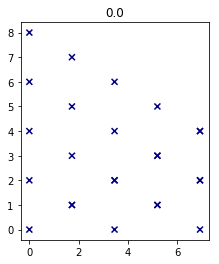

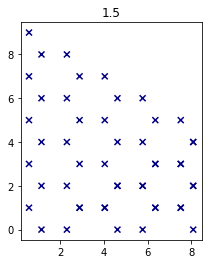

In [56]:
Hexagonal_P = pmg.Structure.from_spacegroup(168,hexagonal_lattice, [Ga], [[0, 0, 0]])
delta = 0.001
Hexagonal_P_ad = pmg.Structure.from_spacegroup(168,hexagonal_lattice, [Ga,Ga], [[0, 0, 0+delta],[2/3,1/3,1/2]])
Hexagonal_P_ad.make_supercell([5,5,1],to_unit_cell=False)


#print(Hexagonal_P_ad)
d =Hexagonal_P_ad.as_dict()
plan_view_points = []
sp = []
for x in d['sites']:
    plan_view_points.append(np.abs((np.round(x['xyz'],2))))
    sp.append(x['label']=='Ga')

sp = np.asarray([float(x) for x in sp])
pvp = np.asarray(plan_view_points)
print(np.unique(pvp[:,2]))
for layer in np.unique(pvp[:,2]):
    pv_layer = pvp[pvp[:,2]==layer]
    sp_layer = sp[pvp[:,2]==layer]
    #print(sp_layer)
    f = plt.figure()
    ax = f.add_subplot(1, 1, 1)
    ax.set_aspect(aspect='equal')
    plt.title(str(layer))
    plt.scatter(pv_layer[:,1],pv_layer[:,0],marker='x',c=sp_layer,cmap='jet')
    plt.show()

In [55]:
Cubic_I.make_supercell?

In [38]:
u = 0.2
structure = pmg.Structure.from_spacegroup("P6_3mc",hexagonal_lattice, [Ga,N], [[0, 0, 0],[2/3,1/3,u]])

In [39]:
structure

Structure Summary
Lattice
    abc : 2.0 2.0 3.0
 angles : 90.0 90.0 119.99999999999999
 volume : 10.392304845413266
      A : 2.0 0.0 1.2246467991473532e-16
      B : -0.99999999999999944 1.7320508075688776 1.2246467991473532e-16
      C : 0.0 0.0 3.0
PeriodicSite: Ga (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Ga (0.0000, 0.0000, 1.5000) [0.0000, 0.0000, 0.5000]
PeriodicSite: N (1.0000, 0.5774, 0.6000) [0.6667, 0.3333, 0.2000]
PeriodicSite: N (-0.0000, 1.1547, 2.1000) [0.3333, 0.6667, 0.7000]

In [57]:
plt.close('all')